# pandas cookbook

In [1]:
import pandas as pd
import numpy as np

## 基本操作

### 查看基本数据

*  Sum of values in a data frame

df.sum()

* Lowest value of a data frame

df.min()

*  Highest value

df.max()

* Index of the lowest value

df.idxmin()

* Index of the highest value

df.idxmax()

*  Statistical summary of the data frame, with quartiles, median, etc.

df.describe()

* Average values

df.mean()

* Median values

df.median()

* Correlation between columns

df.corr()

*  To get these values for only one column, just select it like this#

df["size"].median()

In [14]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
print(x.shape)# 数据的形状
print(x.dtypes) #数据的类型
print(x.index.tolist()) #数据的索引
print(x.columns.tolist()) #数据的列名
print(x.describe()) #查看数据的详细信息
print(x.head()) # 展示数据前5行
print(x.tail()) #展示数据的后5行
print(x.info())


(6, 3)
A    int64
B    int64
C    int64
dtype: object
[0, 1, 2, 3, 4, 5]
['A', 'B', 'C']
              A         B        C
count  6.000000  6.000000  6.00000
mean   5.666667  3.166667  4.00000
std    2.338090  3.125167  3.03315
min    3.000000  0.000000  0.00000
25%    3.750000  0.500000  2.25000
50%    6.000000  3.000000  3.50000
75%    6.750000  4.750000  6.25000
max    9.000000  8.000000  8.00000
   A  B  C
0  3  2  2
1  3  4  4
2  6  5  3
3  6  8  8
4  7  0  7
   A  B  C
1  3  4  4
2  6  5  3
3  6  8  8
4  7  0  7
5  9  0  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       6 non-null      int64
 1   B       6 non-null      int64
 2   C       6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes
None


In [3]:
print(x['A'].sum())
print(x['A'].value_counts())

34
6    2
3    2
7    1
9    1
Name: A, dtype: int64


### 选择多列数据

In [4]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
pf = pd.DataFrame(d)
data = pf[['A','C']]
data

,A,C
0,3,2
1,3,4
2,6,3
3,6,8
4,7,7
5,9,0


### 选择多行数据

In [5]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
pf = pd.DataFrame(d)
data = pf[['A','C']]
data

,A,C
0,3,2
1,3,4
2,6,3
3,6,8
4,7,7
5,9,0


### 选择指定值的数据

*  选取等于某些值的行记录 用 ==

df.loc[df['column_name'] == some_value]

* 选取某列是否是某一类型的数值 用 isin

df.loc[df['column_name'].isin([some_values,])]

* 多种条件的选取 用 &

df.loc[(df['column'] == some_value) & df['other_column'].isin(some_values)]

* 选取不等于某些值的行记录 用 ！=

df.loc[df['column_name'] != some_value]

* isin返回一系列的数值,如果要选择不符合这个条件的数值使用~

df.loc[~df['column_name'].isin(some_values)]

In [6]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
pf = pd.DataFrame(d)
data = pf[(pf['A']==3) & (pf['B']==4) ]
print(data)
print("\n", pf.loc[pf['A'] == 9])
print("\n", pf.loc[pf['A'].isin([3])])
print("\n", pf.loc[~pf['A'].isin([3])])

   A  B  C
1  3  4  4

    A  B  C
5  9  0  0

    A  B  C
0  3  2  2
1  3  4  4

    A  B  C
2  6  5  3
3  6  8  8
4  7  0  7
5  9  0  0


### 对列求和和对行求和

* 对行求和  

- [ ] df['sum'] = df.apply(lambda x: x.sum(), axis=1)

* 对列进行求和

- [ ] df['A'].sum()
- [ ] pf[['A','B','C']].sum()
- [ ] pf.apply(lambda x: x.sum(), axis=0)


In [7]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
pf = pd.DataFrame(d)

pf['D'] = pf.apply(lambda x: x.sum(), axis=1)
print(pf)

   A  B  C   D
0  3  2  2   7
1  3  4  4  11
2  6  5  3  14
3  6  8  8  22
4  7  0  7  14
5  9  0  0   9


In [8]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
pf = pd.DataFrame(d)
pf[['A','B','C']].sum()
pf['Col_sum']= pf.apply(lambda x: x.sum(), axis=1)  #新增加一列
pf.loc['Row_sum'] = pf.apply(lambda x: x.sum()) #新增加一行
pf

,A,B,C,Col_sum
0,3,2,2,7
1,3,4,4,11
2,6,5,3,14
3,6,8,8,22
4,7,0,7,14
5,9,0,0,9
Row_sum,34,19,24,77


### 删除多列数据

In [9]:
def drop_multiple_col(col_names_list, df): 
    '''
    AIM    -> Drop multiple columns based on their column names 

    INPUT  -> List of column names, df

    OUTPUT -> updated df with dropped columns 
    ------
    '''
    df.drop(col_names_list, axis=1, inplace=True)
    return df

d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
drop_multiple_col(['A','C'],x)
print(x)
print(x.columns.tolist())

   B
0  2
1  4
2  5
3  8
4  0
5  0
['B']


### 删除多行数据

In [10]:
def drop_multiple_index(index, df): 
    '''
    AIM    -> Drop multiple columns based on their column names 

    INPUT  -> List of column names, df

    OUTPUT -> updated df with dropped columns 
    ------
    '''
    df.drop(index, inplace=True)
    return df

d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
drop_multiple_index([0,2,3],x)  
print(x)
print("drop after index:",x.index.values)

x.reset_index(drop=True, inplace=True) #重置原索引
print("reset_index:", x.index.values)

   A  B  C
1  3  4  4
4  7  0  7
5  9  0  0
drop after index: [1 4 5]
reset_index: [0 1 2]


### 删除缺少的数据

In [ ]:
df.dropna(axis=0, how='any')

### 数据类型转换 Dtypes

In [11]:
def change_dtypes(col_int, col_float, df): 
    '''
    AIM    -> Changing dtypes to save memory

    INPUT  -> List of column names (int, float), df

    OUTPUT -> updated df with smaller memory  
    ------
    '''
    df[col_int] = df[col_int].astype('int32')
    df[col_float] = df[col_float].astype('float32')

change_dtypes('A','B', x)
x.dtypes

A      int32
B    float32
C      int64
dtype: object

###  将分类变量转换为数值变量

In [12]:
def convert_cat2num(df):
    # Convert categorical variable to numerical variable
    num_encode = {'col_1' : {'YES':1, 'NO':0},
                  'col_2'  : {'WON':1, 'LOSE':0, 'DRAW':0}}  
    df.replace(num_encode, inplace=True) 
    
d = {'col_1': ['YES', 'YES', 'NO', 'NO', 'NO', 'NO'], 'col_2': ['WON', 'LOSE', 'DRAW',  'LOSE', 'DRAW','WON'],'C': [2,4, 3, 8, 7, 0]}
data =pd.DataFrame(d)
convert_cat2num(data)
data

,col_1,col_2,C
0,1,1,2
1,1,0,4
2,0,0,3
3,0,0,8
4,0,0,7
5,0,1,0


### 检查缺失的数据 &&检查是否有空值

In [13]:
def check_missing_data(df):
    # check for any missing data in the df (display in descending order)
    return df.isnull().sum().sort_values(ascending=False)

d = {'col_1': [None, 'YES', 'NO', 'NO',None,None], 'col_2': ['WON', None, 'DRAW',  'LOSE', 'DRAW','WON'],'C': [2,4, 3, None, 7, 0]}
df =pd.DataFrame(d)
check_missing_data(df)

col_1    3
C        1
col_2    1
dtype: int64

### 删除列中的字符串

In [14]:
def remove_col_str(df):
    # remove a portion of string in a dataframe column - col_1
    df['col_1'].replace('\n', '', regex=True, inplace=True)

    # remove all the characters after &# (including &#) for column - col_1
    df['col_1'].replace(' &#.*', '', regex=True, inplace=True)

d = {'col_1': [None, 'YES', 'NO', 'NO',None,None], 'col_2': ['WON', None, 'DRAW',  'LOSE', 'DRAW','WON'],'C': [2,4, 3, None, 7, 0]}
df =pd.DataFrame(d)
remove_col_str(df)
df

,col_1,col_2,C
0,None,WON,2.0
1,YES,None,4.0
2,NO,DRAW,3.0
3,NO,LOSE,NaN
4,None,DRAW,7.0
5,None,WON,0.0


In [15]:
def remove_col_white_space(df):
    # remove white space at the beginning of string 
    df[col] = df[col].str.lstrip().rstrip()
d = {'col_1': [None, 'YES  ', 'NO', 'NO',None,None], 'col_2': ['WON', None, 'DRAW',  ' LOSE', ' DRAW','WON'],'C': [2,4, 3, None, 7, 0]}
df =pd.DataFrame(d)
remove_col_str(df)
df    

,col_1,col_2,C
0,None,WON,2.0
1,YES,None,4.0
2,NO,DRAW,3.0
3,NO,LOSE,NaN
4,None,DRAW,7.0
5,None,WON,0.0


### 将两列字符串数据（在一定条件下）拼接起来

In [16]:
d = {'col_1': ['YES', 'YES', 'NO', 'NO', 'NO', 'NO'], 'col_2': ['WON', 'LOSE', 'DRAW',  'LOSE', 'DRAW','WON'],'C': [2,4, 3, 8, 7, 0]}
df =pd.DataFrame(d)
df['col_1'] = df["col_1"].str.cat(df["col_2"],sep="-")
print("results:\n",df)

print("多个列进行拼接:\n", df['col_2'].str.cat([df['C'].astype("str"), df['col_2']],sep="-"))
df

results:
       col_1 col_2  C
0   YES-WON   WON  2
1  YES-LOSE  LOSE  4
2   NO-DRAW  DRAW  3
3   NO-LOSE  LOSE  8
4   NO-DRAW  DRAW  7
5    NO-WON   WON  0
多个列进行拼接:
 0      WON-2-WON
1    LOSE-4-LOSE
2    DRAW-3-DRAW
3    LOSE-8-LOSE
4    DRAW-7-DRAW
5      WON-0-WON
Name: col_2, dtype: object


,col_1,col_2,C
0,YES-WON,WON,2
1,YES-LOSE,LOSE,4
2,NO-DRAW,DRAW,3
3,NO-LOSE,LOSE,8
4,NO-DRAW,DRAW,7
5,NO-WON,WON,0


### 插入一行数据
* df.loc[index] 实现添加一行数据
* df.append() 实现添加一行数据

In [17]:
df = pd.DataFrame(columns=('lib', 'qty1', 'qty2'))#生成空的pandas表
for i in range(5):#插入一行<span id="transmark" style="display:none;"></span>
    df.loc[len(df)] = [np.random.randint(-1,1) for n in range(3)]
print("df.loc[index]:\n", df)


from numpy.random import randint
df = df.append({'lib':randint(-1,1), 'qty1':randint(-1,1), 'qty2':randint(-1,1)}, ignore_index=True)

print("df.append:\n", df)

df.loc[index]:
   lib qty1 qty2
0   0    0    0
1  -1   -1    0
2   0    0   -1
3   0    0    0
4   0   -1   -1
df.append:
   lib qty1 qty2
0   0    0    0
1  -1   -1    0
2   0    0   -1
3   0    0    0
4   0   -1   -1
5  -1   -1   -1


### 插入一列或者多列数据

* 利用pd.concat 在DataFrame后面添加两列，这种方法的缺点是不能指定位置  pd.concat([df, pd.DataFrame(columns=list('DE'))])
* 利用 reindex来重排和增加列名df.reindex(columns=list('ABCDE'))

In [18]:
pd.concat([df, pd.DataFrame(columns=list('DE'))])

,lib,qty1,qty2,D,E
0,0,0,0,NaN,NaN
1,-1,-1,0,NaN,NaN
2,0,0,-1,NaN,NaN
3,0,0,0,NaN,NaN
4,0,-1,-1,NaN,NaN
5,-1,-1,-1,NaN,NaN


In [19]:
df.reindex(columns=['lib', 'qty1', 'qty2','C','D'],fill_value=0)

,lib,qty1,qty2,C,D
0,0,0,0,0,0
1,-1,-1,0,0,0
2,0,0,-1,0,0
3,0,0,0,0,0
4,0,-1,-1,0,0
5,-1,-1,-1,0,0


### 将字符串转换为时间戳

In [20]:
def convert_str_datetime(df): 
    '''
    AIM    -> Convert datetime(String) to datetime(format we want)

    INPUT  -> df

    OUTPUT -> updated df with new datetime format 
    ------
    '''
    df.insert(loc=2, column='timestamp', value=pd.to_datetime(df.transdate, format='%Y-%m-%d %H:%M:%S.%f'))

In [22]:
# # %matplotlib inline
# # %config InlineBackend.figure_format = 'retina'
# # import matplotlib.pyplot as plt
# # import pandas as pd
# # import numpy as np
# # plt.style.use('ggplot')
# # path = 'https://raw.githubusercontent.com/HoijanLai/dataset/master/PoliceKillingsUS.csv'
# # data = pd.read_csv(path, encoding ='latin1')
# # data.sample(3)
# data.groupby(by=['race'])['age'].mean()
# data.groupby('race')['signs_of_mental_illness'].value_counts()
# data.groupby('race')['signs_of_mental_illness'].value_counts().unstack()
# races = np.sort(data['race'].dropna().unique())
# fig, axes = plt.subplots(1, len(races), figsize=(24, 4), sharey=True)
# for ax, race in zip(axes, races):
#     data[data['race']==race]['flee'].value_counts().sort_index().plot(kind='bar', ax=ax, title=race)

## 排序

### 对指定的类进行排序

In [23]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
x.sort_values(by=['A'], ascending=[False])

,A,B,C
5,9,0,0
4,7,0,7
2,6,5,3
3,6,8,8
0,3,2,2
1,3,4,4


### 对多个列进行排序

In [24]:
d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
x.sort_values(by=['A','B'], ascending=[False,False])

,A,B,C
5,9,0,0
4,7,0,7
3,6,8,8
2,6,5,3
1,3,4,4
0,3,2,2


## 聚合函数

### groupby函数

In [1]:
import pandas as pd

d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
x.groupby(by=['A']).mean()

,B,C
A,,
3,3.0,3.0
6,6.5,5.5
7,0.0,7.0
9,0.0,0.0


In [2]:
x.groupby(by=['A']).mean().reset_index()

,A,B,C
0,3,3.0,3.0
1,6,6.5,5.5
2,7,0.0,7.0
3,9,0.0,0.0


### explode用于将一行数据展开成多行

In [28]:
id = ['a','b','c']
measurement = [4,6,[2,3,8]]
day = [1,1,1]
df = pd.DataFrame({'id':id, 'measurement':measurement, 'day':day})
df

,id,measurement,day
0,a,4,1
1,b,6,1
2,c,"[2, 3, 8]",1


In [29]:
df.explode('measurement').reset_index(drop=True)

,id,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
3,c,3,1
4,c,8,1


### Nunique 用于计算行或列上唯一值的数量，即去重后计数

* Series.nunique(dropna=True)

* DataFrame.nunique(axis=0, dropna=True)
    
- [ ] axis：int型，0代表行，1代表列，默认0；
- [ ] dropna：bool类型，默认为True，计数中不包括NaN；

In [35]:
id = ['a','b','c']
measurement = [4,6,4]
day = [1,1,1]
df = pd.DataFrame({'id':id, 'measurement':measurement, 'day':day})
print(df.nunique(axis=0, dropna=True))
print("measurement:",df.measurement.nunique())

id             3
measurement    2
day            1
dtype: int64
measurement: 2


### infer_objects 直接将df或者series推断为合适的数据类型
* DataFrame.infer_objects()

In [38]:
df = pd.DataFrame({"A": ["a", 1, 2, 3]})
df = df.iloc[1:]
print(df.dtypes, "\n",df.infer_objects().dtypes)

A    object
dtype: object 
 A    int64
dtype: object


### replace函数

In [40]:
values_1 = np.random.randint(10, size=10)
values_2 = np.random.randint(10, size=10)
years = np.arange(2010,2020)
groups = ['A','A','B','A','B','B','C','A','C','C']
df = pd.DataFrame({'group':groups, 'year':years, 'value_1':values_1, 'value_2':values_2})

df.replace('A','D') #将A全部替换为D：
df.replace({'B':'E','C':'F'}) #将B替换为E，C替换为F：

,group,year,value_1,value_2
0,A,2010,0,5
1,A,2011,7,7
2,E,2012,2,4
3,A,2013,0,4
4,E,2014,7,9
5,E,2015,0,2
6,F,2016,8,8
7,A,2017,2,2
8,F,2018,9,5
9,F,2019,5,6


### memory_usage函数

In [42]:
df.memory_usage()

Index      128
group       80
year        80
value_1     80
value_2     80
dtype: int64

### 重新命名列

In [35]:
df.rename(columns = {df.columns[2]:'size'}, inplace=True)
df

,A,B,size
0,6,2,2
1,6,4,4
2,12,5,3
3,12,8,8
4,14,0,7
5,18,0,0


## io接口

* csv
* excel
* hdf5
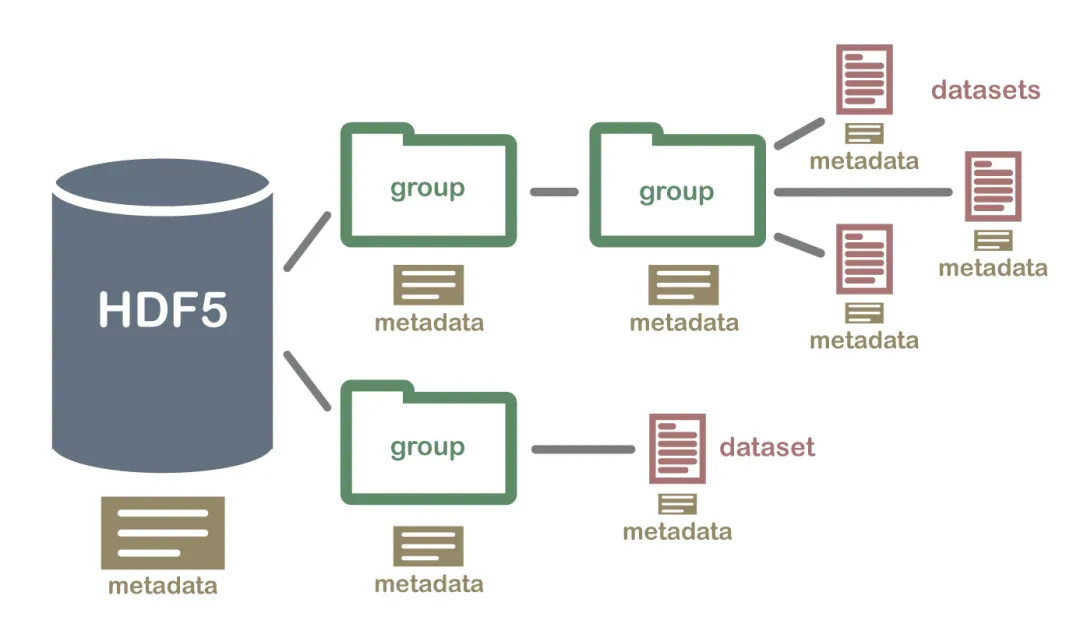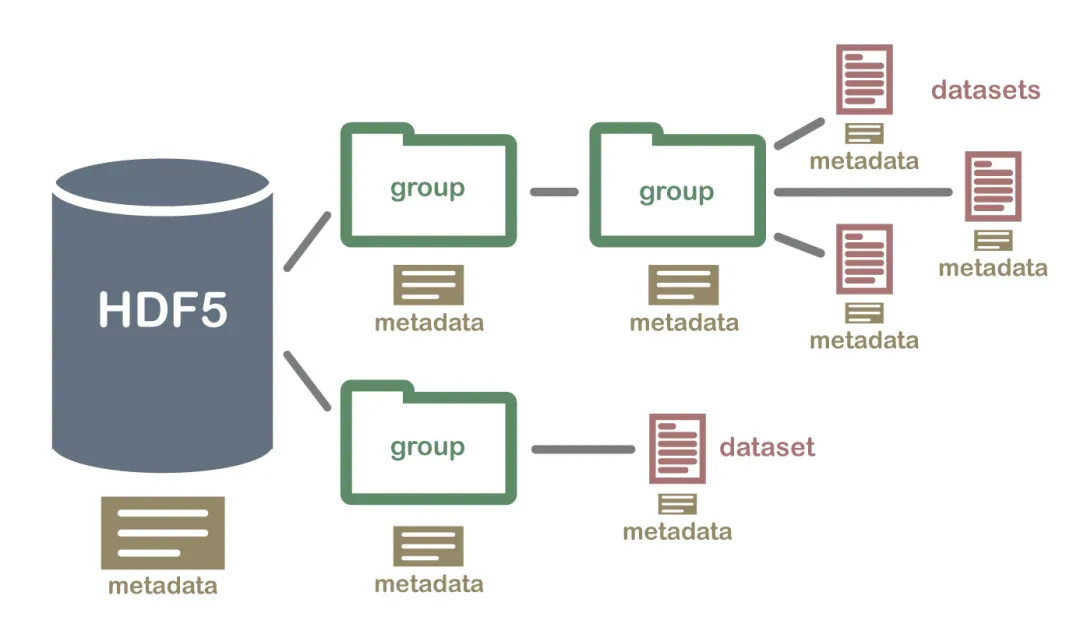

### 保存和读取csv文件
* pd.to_csv("xxxx.csv", index=False)
* pd.read_csv("xxx.csv")


In [ ]:
import pandas as pd

store = pd.HDFStore('demo.h5')
'''查看store类型'''
print(store)

In [44]:
import numpy as np

#创建一个series对象
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

#创建一个dataframe对象
df = pd.DataFrame(np.random.randn(8, 3),
                 columns=['A', 'B', 'C'])

#插入键值
store['s'], store['df'] = s, df  #利用键值对将不同的数据存入store对象中
# store.put(key='s', value=s);store.put(key='df', value=df)  #使用put()方法将数据存入store对象中：

# 删除对应的键值
# store.remove('s') 
# del store['s']  

store.items

<bound method HDFStore.items of <class 'pandas.io.pytables.HDFStore'>
File path: demo.h5
>

In [45]:
store['df']

,A,B,C
0,-0.197898,0.954950,0.425507
1,1.171126,-0.183754,-0.290026
2,-0.019126,-1.145156,0.176075
3,-0.919408,0.408087,-1.042026
4,0.241265,-2.046131,-0.591375
5,-2.405437,0.441058,-0.116413
6,-1.537260,-1.395021,0.938024
7,-0.420074,1.093723,-1.367957


### 保存到hdf5文件中

In [46]:
#创建新的数据框
df_ = pd.DataFrame(np.random.randn(5,5))
#导出到已存在的h5文件中，这里需要指定key
df_.to_hdf(path_or_buf='demo.h5',key='df_')
#创建于本地demo.h5进行IO连接的store对象
store = pd.HDFStore('demo.h5')
#查看指定h5对象中的所有键
print(store.keys())

['/df', '/df_', '/s']


### 读取hdf5文件

In [47]:
store = pd.HDFStore('demo.h5')

'''方式1'''
df1 = store['df']
'''方式2'''
df2 = store.get('df')


,A,B,C
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True


### hdf5 vs csv性能比较

In [52]:
import pandas as pd
import numpy as np
import time

store = pd.HDFStore('store.h5')
#生成一个1亿行，5列的标准正态分布随机数表
df = pd.DataFrame(np.random.rand(1000000,5))
start1 = time.time()
store['df'] = df
store.close()
print(f'HDF5存储用时{time.time()-start1}秒')
start2 = time.time()
df.to_csv('df.csv',index=False)
print(f'csv存储用时{time.time()-start2}秒')

HDF5存储用时0.023400068283081055秒
csv存储用时8.149113893508911秒


## 常用函数

### 计算变量缺失率

In [ ]:
# 如果需要计算样本的缺失率分布，只要加上参数axis=1.
def missing_cal(df):
    """
    df :数据集
    
    return：每个变量的缺失率
    """
    missing_series = df.isnull().sum()/df.shape[0]
    missing_df = pd.DataFrame(missing_series).reset_index()
    missing_df = missing_df.rename(columns={'index':'col',
                                            0:'missing_pct'})
    missing_df = missing_df.sort_values('missing_pct',ascending=False).reset_index(drop=True)
    return missing_df


### 获取分组里最大值所在的行方法

In [55]:
df = pd.DataFrame({'Sp':['a','b','c','d','e','f'], 'Mt':['s1', 's1', 's2','s2','s2','s3'], 'Value':[1,2,3,4,5,6], 'Count':[3,2,5,10,10,6]})
df.iloc[df.groupby(['Mt']).apply(lambda x: x['Count'].idxmax())]


# 对ID进行分组之后再对分数应用rank函数，分数相同的情况会赋予相同的排名，然后取出排名为1的数据。
# df["rank"] = df.groupby("ID")["score"].rank(method="min", ascending=False).astype(np.int64)
# df[df["rank"] == 1][["ID", "class"]]

### 多列合并为一行

In [58]:
df = pd.DataFrame({'id_part':['a','b','c','d'], 'pred':[0.1,0.2,0.3,0.4], 'pred_class':['women','man','cat','dog'], 'v_id':['d1','d2','d3','d1']})
print(df)
df.groupby(['v_id']).agg({'pred_class': [', '.join],'pred': lambda x: list(x),
'id_part': 'first'}).reset_index()

  id_part  pred pred_class v_id
0       a   0.1      women   d1
1       b   0.2        man   d2
2       c   0.3        cat   d3
3       d   0.4        dog   d1


,v_id,pred_class,pred,id_part
,,join,<lambda>,first
0,d1,"women, dog","[0.1, 0.4]",a
1,d2,man,[0.2],b
2,d3,cat,[0.3],c


### 删除包含特定字符串所在的行

In [59]:
df = pd.DataFrame({'a':[1,2,3,4], 'b':['s1', 'exp_s2', 's3','exps4'], 'c':[5,6,7,8], 'd':[3,2,5,10]})
df[df['b'].str.contains('exp')]

,a,b,c,d
1,2,exp_s2,6,2
3,4,exps4,8,10


### 组内排序

In [61]:
df = pd.DataFrame([['A',1],['A',3],['A',2],['B',5],['B',9]], columns = ['name','score'])
df

,name,score
0,A,1
1,A,3
2,A,2
3,B,5
4,B,9


In [62]:
df.sort_values(['name','score'], ascending = [True,False]) #方式1
df.groupby('name').apply(lambda x: x.sort_values('score', ascending=False)).reset_index(drop=True) #方式2

,name,score
0,A,3
1,A,2
2,A,1
3,B,9
4,B,5


### 选择特定类型的列

In [63]:
# # 选择所有数值型的列
# drinks.select_dtypes(include=['number']).head()
# # 选择所有字符型的列
# drinks.select_dtypes(include=['object']).head()
# drinks.select_dtypes(include=['number','object','category','datetime']).head()
# # 用 exclude 关键字排除指定的数据类型
# drinks.select_dtypes(exclude=['number']).head()


### 字符串转换为数值

In [64]:
# df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

### 优化 DataFrame 对内存的占用

* 只读取切实所需的列，使用usecols参数
```
cols = ['beer_servings','continent']
small_drinks = pd.read_csv('data/drinks.csv', usecols=cols)

```
* 把包含类别型数据的 object 列转换为 Category 数据类型，通过指定 dtype 参数实现。

```
dtypes ={'continent':'category'}
smaller_drinks = pd.read_csv('data/drinks.csv',usecols=cols, dtype=dtypes)
```


### 根据最大的类别筛选 DataFrame

In [ ]:
movies = pd.read_csv('data/imdb_1000.csv')
counts = movies.genre.value_counts()
movies[movies.genre.isin(counts.nlargest(3).index)].head()

### 把字符串分割为多列

In [65]:
df = pd.DataFrame({'姓名':['张 三','李 四','王 五'],
                   '所在地':['北京-东城区','上海-黄浦区','广州-白云区']})
df
df.姓名.str.split(' ', expand=True)

,0,1
0,张,三
1,李,四
2,王,五


### 把 Series 里的列表转换为 DataFrame

In [66]:
df = pd.DataFrame({'列1':['a','b','c'],'列2':[[10,20], [20,30], [30,40]]})
df_new = df.列2.apply(pd.Series)
pd.concat([df,df_new], axis='columns')


,列1,列2,0,1
0,a,"[10, 20]",10,20
1,b,"[20, 30]",20,30
2,c,"[30, 40]",30,40


### 用agg聚合多个函数

In [ ]:
orders = pd.read_csv('data/chipotle.tsv', sep='\t')
orders.groupby('order_id').item_price.agg(['sum','count']).head()

### apply聚合

In [67]:
import pandas as pd
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
    'key2':['one', 'two', 'one', 'two', 'one'],
    'data1':np.random.randn(5),
     'data2':np.random.randn(5)})

for name, group in df.groupby('key1'):
    print(name)
    print(group)

dict(list(df.groupby('key1')))

a
  key1 key2     data1     data2
0    a  one -0.913284  0.216818
1    a  two -0.462426  2.150335
4    a  one -0.117332  0.420947
b
  key1 key2     data1     data2
2    b  one -1.161765  0.290129
3    b  two  0.561636  0.093682


{'a':   key1 key2     data1     data2
 0    a  one -0.913284  0.216818
 1    a  two -0.462426  2.150335
 4    a  one -0.117332  0.420947,
 'b':   key1 key2     data1     data2
 2    b  one -1.161765  0.290129
 3    b  two  0.561636  0.093682}

In [68]:
### 通过字典或Series进行分组

people = pd.DataFrame(np.random.randn(5, 5),
     columns=['a', 'b', 'c', 'd', 'e'],
     index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
mapping = {'a':'red', 'b':'red', 'c':'blue',
     'd':'blue', 'e':'red', 'f':'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,1.191747,-0.245068
Steve,-2.063417,0.747063
Wes,0.175773,2.059009
Jim,1.487454,3.483311
Travis,-1.087310,0.577130


In [36]:
import pandas as pd

d = {'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
df  =pd.DataFrame(d)
df['A']= df["A"].apply(lambda height: 2 * height)
df

,A,B,C
0,6,2,2
1,6,4,4
2,12,5,3
3,12,8,8
4,14,0,7
5,18,0,0


In [37]:
def multiply(x):
    return x * 2

df["A"].apply(multiply)

0    12
1    12
2    24
3    24
4    28
5    36
Name: A, dtype: int64

### map函数

In [39]:
df["A"].map(multiply)
df["A"].map(lambda height: 2 * height)

0    12
1    12
2    24
3    24
4    28
5    36
Name: A, dtype: int64

## 高级函数

In [2]:
import pandas as pd

id = ['a','b','c']
measurement = [4,6,[2,3,8]]
day = [1,1,1]
df1 = pd.DataFrame({'id':id, 'measurement':measurement, 'day':day})
df1

,id,measurement,day
0,a,4,1
1,b,6,1
2,c,"[2, 3, 8]",1


### explode 函数
* explode用于将一行数据展开成多行

In [3]:
zz = df1.explode('measurement').reset_index(drop=True)
zz

,id,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
3,c,3,1
4,c,8,1


### Nunique函数
* Nunique用于计算行或列上唯一值的数量，即去重后计数。这个函数在分类问题中非常实用，当不知道某字段中有多少类元素时，Nunique能快速生成结果。


- [ ] Series.nunique(dropna=True)

- [ ] DataFrame.nunique(axis=0, dropna=True)


* axis：int型，0代表行，1代表列，默认0；
* dropna：bool类型，默认为True，计数中不包括NaN；

In [6]:
import numpy as np

values_1 = np.random.randint(10, size=10)
values_2 = np.random.randint(10, size=10)
years = np.arange(2010,2020)
groups = ['A','A','B','A','B','B','C','A','C','C']
df = pd.DataFrame({'group':groups, 'year':years, 'value_1':values_1, 'value_2':values_2})
df

,group,year,value_1,value_2
0,A,2010,9,7
1,A,2011,5,5
2,B,2012,9,6
3,A,2013,2,0
4,B,2014,7,4
5,B,2015,5,9
6,C,2016,0,5
7,A,2017,3,1
8,C,2018,9,5
9,C,2019,4,5


In [7]:
df.year.nunique()

10

In [8]:
df.nunique()

group       3
year       10
value_1     7
value_2     7
dtype: int64

### infer_objects函数
* infer_objects用于将object类型列推断为更合适的数据类型

In [9]:
df = pd.DataFrame({"A": ["a", 1, 2, 3]})
df = df.iloc[1:]
df

,A
1,1
2,2
3,3


In [10]:
df.dtypes

A    object
dtype: object

In [11]:
df.infer_objects().dtypes

A    int64
dtype: object

### memory_usage函数
* memory_usage用于计算dataframe每一列的字节存储大小，这对于大数据表非常有用。

参数解释：

* index：指定是否返回df中索引字节大小，默认为True，返回的第一行即是索引的内存使用情况；
* deep：如果为True，则通过查询object类型进行系统级内存消耗来深入地检查数据，并将其包括在返回值中。



In [13]:
df_large = pd.DataFrame({'A': np.random.randn(1000000),
                    'B': np.random.randint(100, size=1000000)})
df_large.shape, df_large.memory_usage()

((1000000, 2),
 Index        128
 A        8000000
 B        8000000
 dtype: int64)

## groupby应用&&输出格式化

In [7]:

import pandas as pd

d = {'姓名':[1,2,1,3,2,3], 'A': [3, 3,6, 6, 7, 9], 'B': [2,4, 5, 8, 0, 0],'C': [2,4, 3, 8, 7, 0]}
x  =pd.DataFrame(d)
x.groupby(by=['A']).mean()

,姓名,B,C
A,,,
3,1.5,3.0,3.0
6,2.0,6.5,5.5
7,2.0,0.0,7.0
9,3.0,0.0,0.0


In [11]:
(x.groupby(by=['姓名']))['A'].agg(['mean','sum']).head(5).style.format('${0:,.2f}')

,mean,sum
姓名,,
1,$4.50,$9.00
2,$5.00,$10.00
3,$7.50,$15.00


In [12]:
consumer_sales = x.groupby('姓名')['A'].agg(['sum']).reset_index()
consumer_sales['消费金额占比'] = consumer_sales['sum'] / consumer_sales['sum'].sum()
(consumer_sales.head(5)
              .style
              .format({'sum':'${0:,.0f}', '消费金额占比': '{:.2%}'}))

,姓名,sum,消费金额占比
0,1,$9,26.47%
1,2,$10,29.41%
2,3,$15,44.12%


### 突出显示特殊值

In [14]:
#求每个月的销售总金额，并分别用红色、绿色高亮显示最大值和最小值
monthly_sales =x.groupby('姓名')['A'].agg(['sum']).reset_index()
monthly_sales['消费金额占比'] = consumer_sales['sum'] / consumer_sales['sum'].sum()

format_dict = {'sum':'${0:,.0f}',  '消费金额占比': '{:.2%}'}
(monthly_sales.style
              .format(format_dict)
              .highlight_max(color='#cd4f39')
              .highlight_min(color='lightgreen'))

,姓名,sum,消费金额占比
0,1,$9,26.47%
1,2,$10,29.41%
2,3,$15,44.12%


In [19]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

zz= (x.groupby(['姓名'])[['A','B']]
     .agg(['sum'])
     .head(5).reset_index()
     .style
     .background_gradient(cmap=cm))
zz

,姓名,A,B
,,sum,sum
0,1,9,7
1,2,10,4
2,3,15,8


### 输出显示分布图

In [30]:
from sparklines import sparklines
import numpy as np
# 定义sparklines函数用于展现数据分布
def sparkline_str(x):
    bins = np.histogram(x)[0]
    sl = ''.join(sparklines(bins))
    return sl

# 定义groupby之后的列名
sparkline_str.__name__ = "分布图"

x.groupby('姓名')[['A', 'B']].agg(['mean', sparkline_str])

A                B            
   mean         分布图 mean         分布图
姓名                                  
1   4.5  █▁▁▁▁▁▁▁▁█  3.5  █▁▁▁▁▁▁▁▁█
2   5.0  █▁▁▁▁▁▁▁▁█  2.0  █▁▁▁▁▁▁▁▁█
3   7.5  █▁▁▁▁▁▁▁▁█  4.0  █▁▁▁▁▁▁▁▁█